# **<font color=yellow > *Predicting Diabetes using Machine Learning algorithms:-* </font>**

## Importing the Needed libraries

In [73]:
# for data analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

print("Imported all the libraries...")

Imported all the libraries...


## Import the Data .csv File and Read the File

In [74]:
# load the 1st raw data
df = pd.read_csv("/diabetes.csv")

# reading the data
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
#reading the first 5 rows
print ("the default first 5 rows: -\n")
df.head()

the default first 5 rows: -



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
#reading the last 5 rows
print ("the default last 5 rows: -\n")
df.tail()

the default last 5 rows: -



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Data Pre-processing

### **Exploratory Data Analysis**

##### Rename the column name

In [77]:
df.rename(columns = {'BloodPressure': "Blood_Pressure", 'SkinThickness': "Skin_Thickness",
                     'DiabetesPedigreeFunction':"Diabetes_Pedigree_Function"}, inplace=True)

df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Type of the dataframe

In [78]:
type(df)

pandas.core.frame.DataFrame

#### Shape of the Dataframe

In [79]:
# print the shape
dataframe_row_count, dataframe_column_count = df.shape
print('Row Count:', dataframe_row_count)
print('Column Count:', dataframe_column_count)

Row Count: 768
Column Count: 9


In [80]:
# print the dimension
df.ndim

2

#### Concise Summary of Dataframe

In [81]:
#print a concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
#all the columns present in the dataframe
columns = list(df.columns)
columns

['Pregnancies',
 'Glucose',
 'Blood_Pressure',
 'Skin_Thickness',
 'Insulin',
 'BMI',
 'Diabetes_Pedigree_Function',
 'Age',
 'Outcome']

In [83]:
df.duplicated().sum()

0

In [84]:
#count of unique values
df.nunique()

Pregnancies                    17
Glucose                       136
Blood_Pressure                 47
Skin_Thickness                 51
Insulin                       186
BMI                           248
Diabetes_Pedigree_Function    517
Age                            52
Outcome                         2
dtype: int64

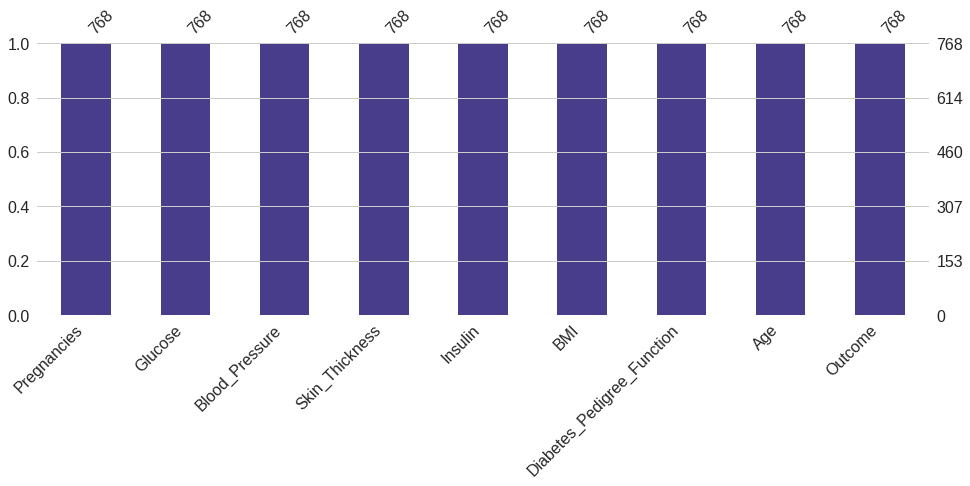

In [85]:
import missingno as msno

msno.bar(df, figsize = (16,5),color = "#483D8B")
plt.show()

In [86]:
# Outcome column
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

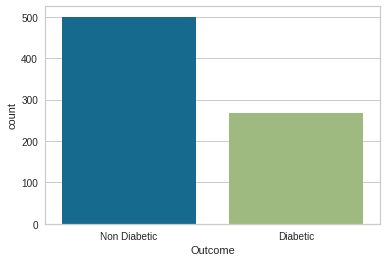

In [87]:
#Plotting the Outcome column
g = sns.countplot(df['Outcome'])
g.set_xticklabels(['Non Diabetic','Diabetic'])
plt.show()

#### Checking the features

###### Numerical features

In [88]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']

print('Number of numerical variables: ',len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  9


,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
for feature in numerical_features:
    print('* The feature is "{}" and number of numeric values is {}'.format(feature,len(df[feature].unique())))

* The feature is "Pregnancies" and number of numeric values is 17
* The feature is "Glucose" and number of numeric values is 136
* The feature is "Blood_Pressure" and number of numeric values is 47
* The feature is "Skin_Thickness" and number of numeric values is 51
* The feature is "Insulin" and number of numeric values is 186
* The feature is "BMI" and number of numeric values is 248
* The feature is "Diabetes_Pedigree_Function" and number of numeric values is 517
* The feature is "Age" and number of numeric values is 52
* The feature is "Outcome" and number of numeric values is 2


In [90]:
for feature in numerical_features:
    print('* The feature is "{}" and the values are {}'.format(feature,df[feature].unique()))

* The feature is "Pregnancies" and the values are [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
* The feature is "Glucose" and the values are [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
* The feature is "Blood_Pressure" and the values are [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
* The feature is "Skin_Thickness" and the values are 

##### Checking for outliers

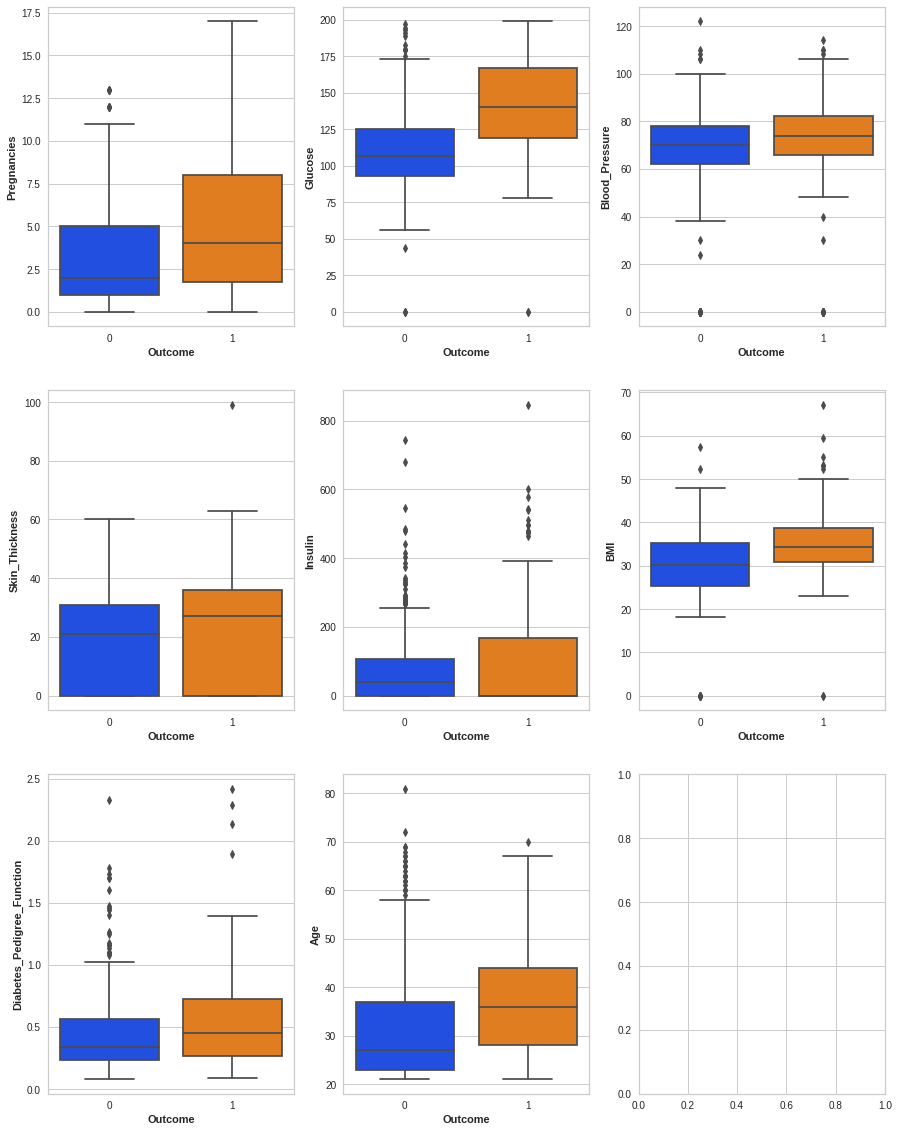

In [91]:
df_num = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']

fig, axs = plt.subplots(3, 3, figsize=(15,20))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="Outcome", y=col_name, data=df, ax=axs[i],  palette = 'bright')
    axs[i].set_xlabel("Outcome", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

In [92]:
discrete_features= [feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete variables count: {}".format(len(discrete_features)))

df[discrete_features].head()

Discrete variables count: 2


,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1


In [93]:
continuous_features= [feature for feature in numerical_features if feature not in discrete_features ]
print("Continuous variables count: {}".format(len(continuous_features)))

df[continuous_features].head()

Continuous variables count: 7


,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


###### Categorical features

In [94]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical features: ',len(categorical_features))

df[categorical_features].head()

Number of categorical features:  0


""
0
1
2
3
4


#### Missing Values

In [95]:
df.isna().any()

Pregnancies                   False
Glucose                       False
Blood_Pressure                False
Skin_Thickness                False
Insulin                       False
BMI                           False
Diabetes_Pedigree_Function    False
Age                           False
Outcome                       False
dtype: bool

#### Statistical Summary of Columns

In [96]:
# statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Blood_Pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes_Pedigree_Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [97]:
df.median()

Pregnancies                     3.0000
Glucose                       117.0000
Blood_Pressure                 72.0000
Skin_Thickness                 23.0000
Insulin                        30.5000
BMI                            32.0000
Diabetes_Pedigree_Function      0.3725
Age                            29.0000
Outcome                         0.0000
dtype: float64

In [98]:
df.quantile(0.75) - df.quantile(0.25)

Pregnancies                     5.0000
Glucose                        41.2500
Blood_Pressure                 18.0000
Skin_Thickness                 32.0000
Insulin                       127.2500
BMI                             9.3000
Diabetes_Pedigree_Function      0.3825
Age                            17.0000
Outcome                         1.0000
dtype: float64

In [99]:
df.corr()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood_Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin_Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_Pedigree_Function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


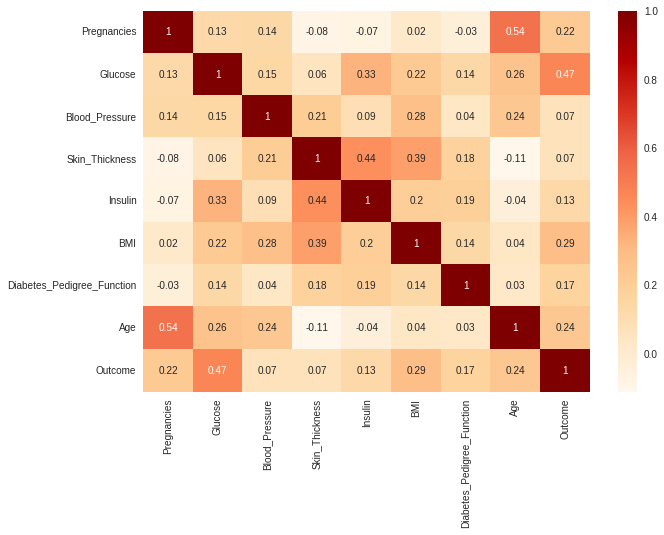

In [100]:
corr = df.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'OrRd')

#### Visualize the Dataset

##### Pairplot

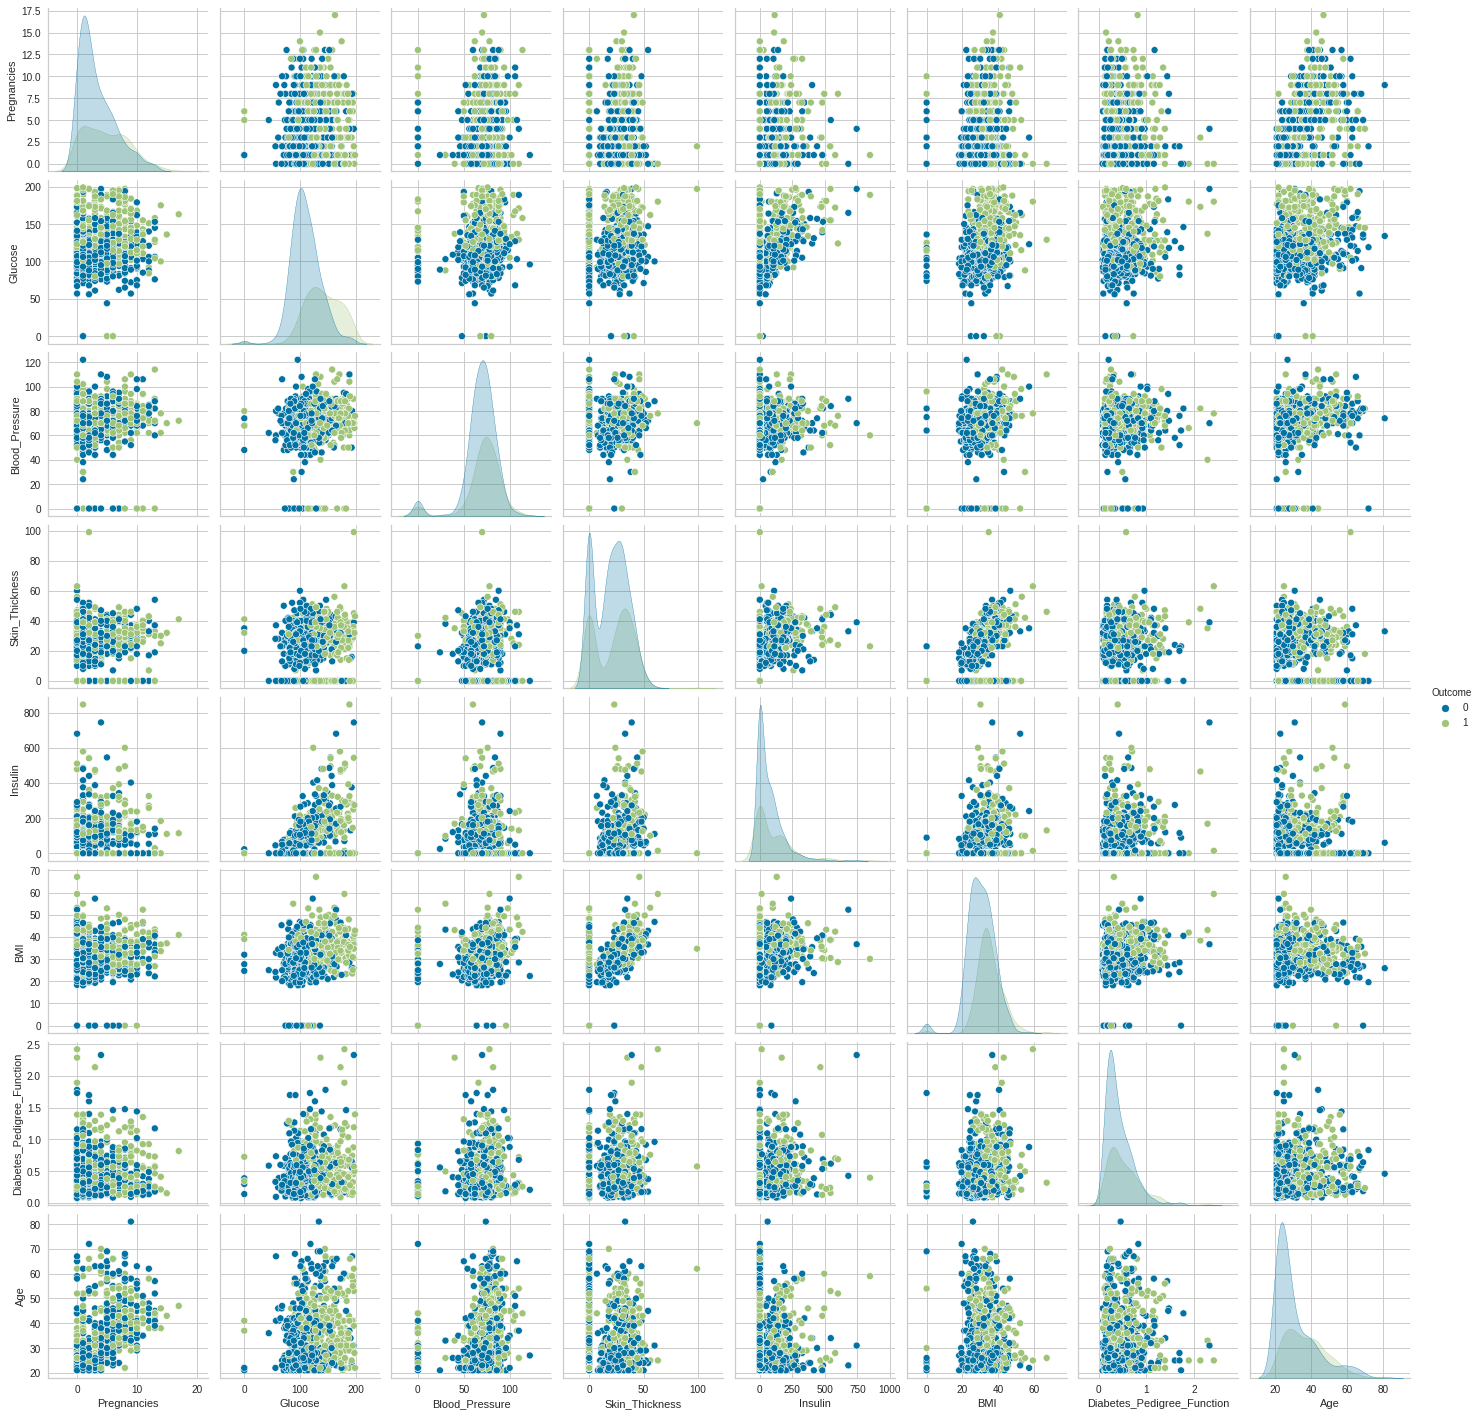

In [101]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(df, hue ='Outcome')

##### Pie Chart

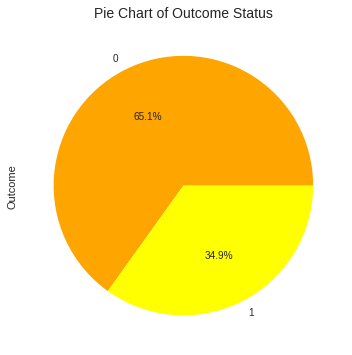

In [102]:
plt.figure(figsize=(5,7))
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['orange','yellow'])
plt.title("Pie Chart of Outcome Status", fontdict={'fontsize': 14})
plt.tight_layout()

##### Distribution plot

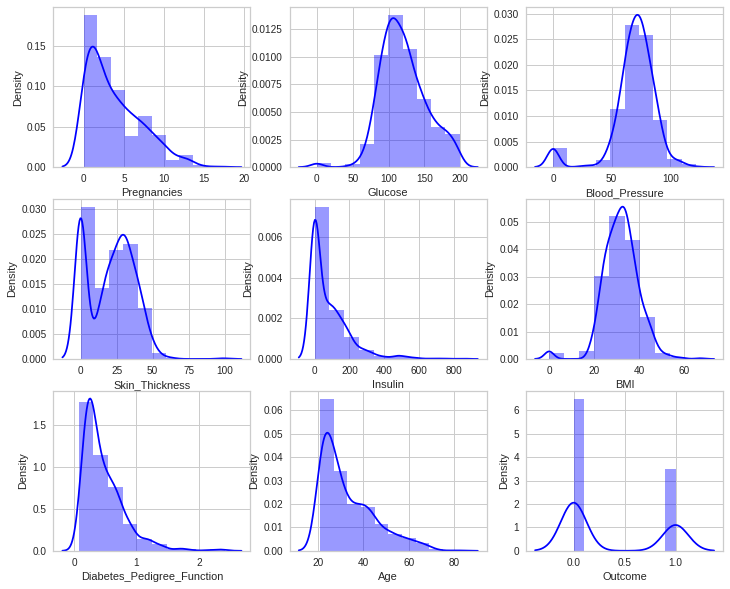

In [103]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns[:9]):
    plt.subplot(3,3,i+1)
    sns.distplot(df[column],kde=True, bins=10, color='blue')

##### Skewness check of the dataset

In [104]:
df.skew().sort_values(ascending = False)

Insulin                       2.272251
Diabetes_Pedigree_Function    1.919911
Age                           1.129597
Pregnancies                   0.901674
Outcome                       0.635017
Glucose                       0.173754
Skin_Thickness                0.109372
BMI                          -0.428982
Blood_Pressure               -1.843608
dtype: float64

#### Finding top features

In [105]:
#Using the SelectKBest library to run a chi-squared statistical test & select the top 3 features that are most related to the output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X= df.iloc[:,0:8] #all features 
Y= df.iloc[:,-1] #target (Outcome)

best_features= SelectKBest(score_func=chi2, k=3) #function that select the top 3 features.
fit= best_features.fit(X,Y) 

#Creating dataframes for the features and the score of each feature.
Outcome_scores= pd.DataFrame(fit.scores_)
Outcome_columns= pd.DataFrame(X.columns)

In [106]:
#Create a dataframe that combines all the features and their corresponding scores.
features_scores= pd.concat([Outcome_columns, Outcome_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
6,Diabetes_Pedigree_Function,5.392682
2,Blood_Pressure,17.605373
3,Skin_Thickness,53.108040
0,Pregnancies,111.519691
5,BMI,127.669343
7,Age,181.303689
1,Glucose,1411.887041
4,Insulin,2175.565273


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Model Building**

In [108]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Splitting the Raw Data into Different Sections

In [109]:
x=df.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [110]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3,
                                                    random_state=2014, stratify=y, shuffle=True)

### Shape of the train and test data

In [112]:
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


### Scaling the dataset

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Checking the distribution

In [114]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.651769
1    0.348231
Name: Outcome, dtype: float64

In [115]:
# distribution in test set
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

### Train the ML models

In [116]:
models = dict()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier(n_estimators = 250, random_state = 2014)
models['Naive Bayes'] = BernoulliNB()
models['xgboost'] = XGBClassifier(max_depth= 8, n_estimators= 250, random_state= 2014,  learning_rate= 0.08, n_jobs=5)
models['AdaBoost'] = AdaBoostClassifier(learning_rate = 0.08, n_estimators = 250, random_state = 2014) 

In [117]:
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Logreg model fitting completed.
Random Forest model fitting completed.
Naive Bayes model fitting completed.
xgboost model fitting completed.
AdaBoost model fitting completed.


### Evaluating the ML models

In [118]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print("Confusion matrix: -\n",confusion_matrix(**arg_test))
    print("\nClassification report: -\n",classification_report(**arg_test))

Test Set Prediction:

--------------------Logreg--------------------
Confusion matrix: -
 [[137  13]
 [ 40  41]]

Classification report: -
               precision    recall  f1-score   support

           0       0.77      0.91      0.84       150
           1       0.76      0.51      0.61        81

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.77      0.77      0.76       231

--------------------Random Forest--------------------
Confusion matrix: -
 [[132  18]
 [ 38  43]]

Classification report: -
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       150
           1       0.70      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231

--------------------Naive Bayes--------------------
Confusion matrix: -
 [[124  2

In [119]:
print('Summary of Accuracy Score: -\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Summary of Accuracy Score: -

Logreg Model:  0.7706
Random Forest Model:  0.7576
Naive Bayes Model:  0.7273
xgboost Model:  0.7489
AdaBoost Model:  0.7532


### Logistic Regression Model

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
classifier = LogisticRegression(random_state=2014, solver = 'lbfgs')

classifier.fit(x_train, y_train)

LogisticRegression(random_state=2014)

In [122]:
y_score = classifier.score(x_train, y_train)

y_score

0.7895716945996276

In [123]:
classifier.score(x_test, y_test)

0.7705627705627706

In [124]:
classifier.predict(x_test)
 
df.columns
 
pred = classifier.predict(x_test)

pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [125]:
cm = confusion_matrix(y_test,pred)
cm

array([[137,  13],
       [ 40,  41]])

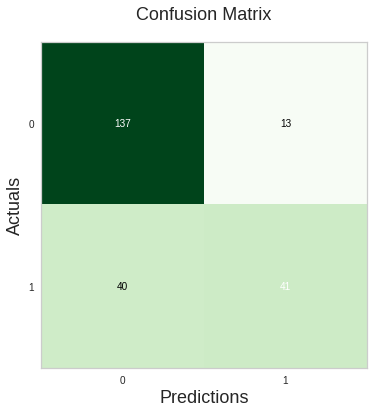

In [126]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6),cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [127]:
if pred[0] == 0:
  print('The patient is not diabetic')
else:
  print('The patient is diabetic')

The patient is not diabetic


### Cross Validation

In [128]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [129]:
logreg=LogisticRegression()

In [130]:
score=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x_train, y_train,cv=10)

In [131]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.7962963  0.77777778 0.83333333 0.77777778 0.77777778 0.75925926
 0.7962963  0.73584906 0.83018868 0.66037736]
Average Cross Validation score :0.774493361285814


In [132]:
score=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x_test, y_test,cv=10)

In [133]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.75       0.69565217 0.86956522 0.73913043 0.7826087  0.7826087
 0.73913043 0.65217391 0.86956522 0.69565217]
Average Cross Validation score :0.7576086956521738


In [134]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
 warnings.simplefilter("ignore")
np.random.seed(42)


In [135]:
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,768.0,-4.218847e-15,116.002490,-91.503611,-80.221421,-49.589442,49.584714,767.474310
col2,768.0,-9.621933e-16,30.541872,-86.251292,-18.338846,3.740402,21.652477,114.929815
col3,768.0,-9.621933e-16,19.763043,-50.138828,-11.263485,-2.156243,6.368619,77.412584


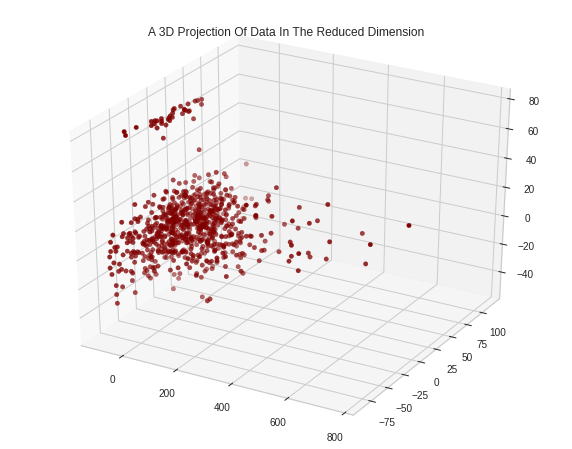

In [136]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


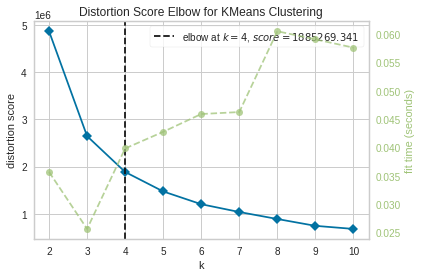

In [137]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()


In [138]:
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

yhat_AC

array([0, 0, 0, 3, 1, 0, 3, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 3, 3, 1, 0,
       0, 0, 1, 3, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 4, 0, 4, 3, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 1, 3, 1, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3,
       3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 3, 1, 0, 0, 0, 3, 0, 1, 0, 1, 0, 3,
       1, 2, 3, 0, 1, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 3, 1, 3, 1, 0, 1, 0,
       1, 0, 3, 1, 3, 3, 0, 4, 0, 0, 3, 0, 4, 0, 0, 1, 0, 0, 1, 0, 1, 2,
       0, 0, 3, 1, 3, 1, 0, 3, 4, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 3, 3, 1,
       0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 2, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 3,
       3, 4, 0, 0, 0, 3, 1, 0, 4, 0, 3, 0, 0, 0, 0, 1, 1, 4, 1, 3, 0, 0,
       2, 0, 0, 1, 3, 3, 0, 0, 2, 3, 0, 4, 3, 0, 3, 0, 1, 0, 0, 0, 0, 3,
       0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 3, 0, 4, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 1, 0, 4, 0, 1, 1, 0, 0, 1,
       2, 1, 3, 3, 3, 3, 1, 1, 0, 1, 4, 1, 1, 0, 0,

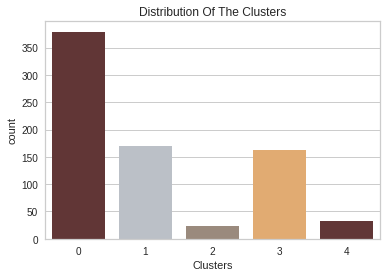

In [139]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=PCA_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()
